<a href="https://colab.research.google.com/github/A01302935/Proyecto_Integrado_Equipo_21/blob/main/Avance5_Equipo21_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

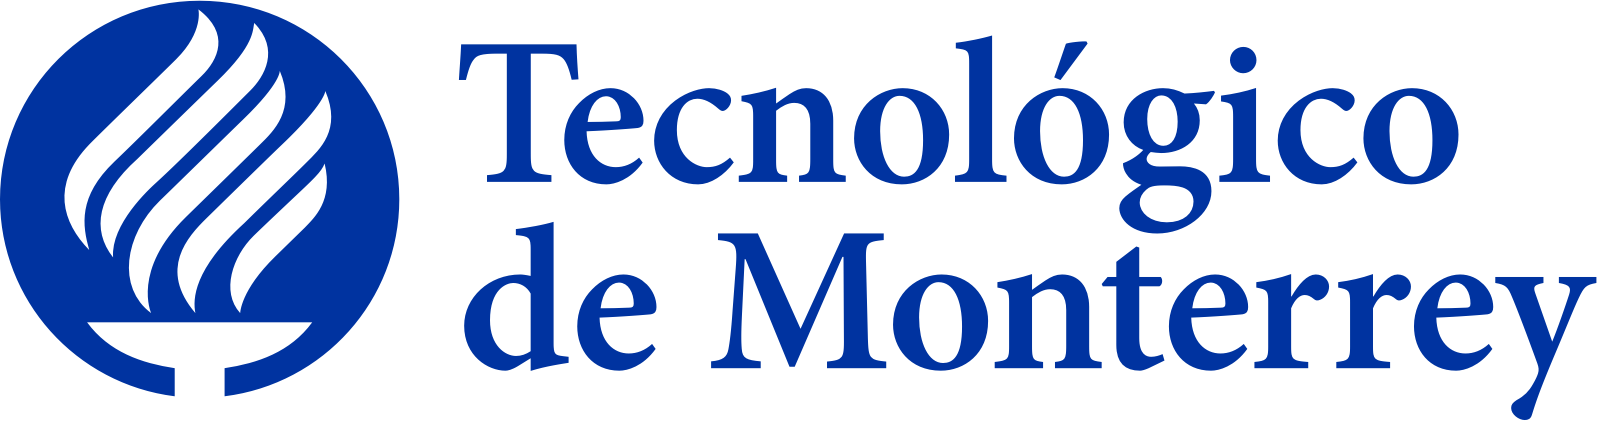
## Proyecto Integrador (Grupo 10)
## Avance 5. Modelo final
### Alumnos:
- **[A01793252]** Aquiles Yonatan Armenta Hernandez
- **[A00989308]**  Alan Avelino Fernández Juárez
- **[A01302935]**  David Mireles Samaniego



In [ ]:
!pip install SQLAlchemy pymssql

In [ ]:
from sqlalchemy import create_engine, text
import pandas as pd

In [ ]:
server = '159.203.186.230'
port = 1433
database = 'GRUA_98'
username = 'sa'
password = 'Pa55w0rd2024'

connection_string = f"mssql+pymssql://{username}:{password}@{server}:{port}/{database}"

# Crear el motor de conexión
engine = create_engine(connection_string)

with engine.connect() as connection:
    result = connection.execute(text("SELECT @@version;"))

    for row in result:
        print(row)

('Microsoft SQL Server 2022 (RTM-CU15-GDR) (KB5046059) - 16.0.4150.1 (X64) \n\tSep 25 2024 17:34:41 \n\tCopyright (C) 2022 Microsoft Corporation\n\tDeveloper Edition (64-bit) on Linux (Ubuntu 22.04.5 LTS) <X64>',)


In [ ]:
tablas = [
    'BRIDGE_1',
    'BRIDGE_2',
    'CABIN',
    'MAIN_HOIST',
    'ROTATION',
    'TROLLEY_1',
    'TROLLEY_2'
]

# Crear un diccionario para almacenar los DataFrames
dataframes = {}

with engine.connect() as connection:
    for i, tabla in enumerate(tablas, start=1):
        # Ejecutar la consulta para seleccionar todo el contenido de la tabla
        query = f"SELECT * FROM GRUA_98.dbo.{tabla};"
        # Cargar el resultado en un DataFrame
        df = pd.read_sql(query, connection)
        # Guardar el DataFrame en el diccionario
        dataframes[f'{tabla}'] = df

        print(f"Datos de la tabla {tabla} guardados en df {tabla}")

Datos de la tabla BRIDGE_1 guardados en df BRIDGE_1
Datos de la tabla BRIDGE_2 guardados en df BRIDGE_2
Datos de la tabla CABIN guardados en df CABIN
Datos de la tabla MAIN_HOIST guardados en df MAIN_HOIST
Datos de la tabla ROTATION guardados en df ROTATION
Datos de la tabla TROLLEY_1 guardados en df TROLLEY_1
Datos de la tabla TROLLEY_2 guardados en df TROLLEY_2


In [ ]:
df = dataframes['MAIN_HOIST']
df.head()

,_Localtime,Motor_current_(A),Motor_relative_current_(_),Motor_relative_torque_(_),Inverter_warning_code,Inverter_fault_code,Inverter_working_hours__h__,Load_cell_actual_weight__T__,Actual_position__mm__,Actual_laser_height__mm__,...,Down_command,Second_speed_command,Third_speed_command,Fourth_speed_command,Up_movement_conditions_OK,Down_movement_conditions_OK,Encoder_non_safety_preset_procedure_active,Encoder_safety_preset_procedure_active,Rotary_encoder_position_enabled,Emergency_brakes_open
0,2024-10-01 00:03:02,279.000000,0.0,0.0,0.0,0.0,21.0,16.370001,6938.000000,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
1,2024-10-01 00:03:03,258.600006,0.0,0.0,0.0,0.0,21.0,16.039999,6618.600098,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
2,2024-10-01 00:03:04,367.600006,0.0,0.0,0.0,0.0,21.0,16.389999,6196.799805,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
3,2024-10-01 00:03:05,478.799988,0.0,0.0,0.0,0.0,21.0,17.100000,5826.799805,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
4,2024-10-01 00:03:06,425.200012,0.0,0.0,0.0,0.0,21.0,17.270000,5594.399902,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0


In [ ]:
print(df.columns)

Index(['_Localtime', 'Motor_current_(A)', 'Motor_relative_current_(_)',
       'Motor_relative_torque_(_)', 'Inverter_warning_code',
       'Inverter_fault_code', 'Inverter_working_hours__h__',
       'Load_cell_actual_weight__T__', 'Actual_position__mm__',
       'Actual_laser_height__mm__', 'First_up_event_(alarm_number)',
       'Inverter_ready', 'Inverter_running', 'Inverter_warning',
       'Inverter_fault', 'Inverter_communication_fault', 'Inverter_selected',
       'Up_command', 'Down_command', 'Second_speed_command',
       'Third_speed_command', 'Fourth_speed_command',
       'Up_movement_conditions_OK', 'Down_movement_conditions_OK',
       'Encoder_non_safety_preset_procedure_active',
       'Encoder_safety_preset_procedure_active',
       'Rotary_encoder_position_enabled', 'Emergency_brakes_open'],
      dtype='object')


In [ ]:
# Importar la librería NumPy
import numpy as np

# Agregar la columna 'Maintenance needed (target)' al DataFrame df
df['Maintenance needed (target)'] = np.where(
    (df['Motor_current_(A)'] > 10000) |  # Condición de horas
    (df['Inverter_fault'] != 0),             # Condición de código de falla
    1,  # Valor cuando se necesita mantenimiento
    0   # Valor cuando no se necesita mantenimiento
)

# Verificar el resultado
df.head()



,_Localtime,Motor_current_(A),Motor_relative_current_(_),Motor_relative_torque_(_),Inverter_warning_code,Inverter_fault_code,Inverter_working_hours__h__,Load_cell_actual_weight__T__,Actual_position__mm__,Actual_laser_height__mm__,...,Second_speed_command,Third_speed_command,Fourth_speed_command,Up_movement_conditions_OK,Down_movement_conditions_OK,Encoder_non_safety_preset_procedure_active,Encoder_safety_preset_procedure_active,Rotary_encoder_position_enabled,Emergency_brakes_open,Maintenance needed (target)
0,2024-10-01 00:03:02,279.000000,0.0,0.0,0.0,0.0,21.0,16.370001,6938.000000,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0
1,2024-10-01 00:03:03,258.600006,0.0,0.0,0.0,0.0,21.0,16.039999,6618.600098,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0
2,2024-10-01 00:03:04,367.600006,0.0,0.0,0.0,0.0,21.0,16.389999,6196.799805,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0
3,2024-10-01 00:03:05,478.799988,0.0,0.0,0.0,0.0,21.0,17.100000,5826.799805,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0
4,2024-10-01 00:03:06,425.200012,0.0,0.0,0.0,0.0,21.0,17.270000,5594.399902,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0


# MODELO BASELINE
## REGRESIÓN LINEAL

In [ ]:
# Variables independientes (X) y la variable dependiente (y)
X = df[['Motor_current_(A)', 'Inverter_working_hours__h__', 'Load_cell_actual_weight__T__']]
y = df['Maintenance needed (target)']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Continuar con el código de la regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Mean Squared Error: 2.798251078662473e-09
R-squared: 0.0


Los valores que nos proporciono la Regresion nos indican lo siguiente:

* Sobreajuste (Overfitting): Un MSE de 0 y un R-squared de 1.0 generalmente indican que el modelo ha aprendido los datos de entrenamiento demasiado bien, lo que puede resultar en un sobreajuste. Esto puede hacer que el modelo no generalice bien a nuevos datos.

* Datos de Entrenamiento: Verifica que los datos no contengan demasiadas características que son idénticas o que haya muy pocos ejemplos. Si tienes un número limitado de datos o si las características son demasiado informativas, esto puede causar un ajuste perfecto.

* Variabilidad de los Datos: Examina la variabilidad de la variable dependiente. Si todos los valores de la variable dependiente son muy similares o si hay poca variabilidad, el modelo puede no estar siendo desafiado adecuadamente.

* Revisión de los Resultados: Asegúrate de revisar los datos que has utilizado. Imprime algunas de las predicciones y compáralas con los valores reales para verificar que efectivamente son iguales.

# MODELOS ALTERNOS

Este avance implica construir múltiples modelos (individuales, no ensambles) relevantes para resolver el problema y evaluar su desempeño. Diferentes algoritmos pueden comportarse de manera óptima en diferentes tipos de datos o tareas. La construcción de modelos alternativos permite explorar y evaluar cuál de ellos proporciona el mejor rendimiento para un problema particular.

Además, los modelos se pueden ajustar para determinar si se puede mejorar su rendimiento. Diferentes configuraciones de hiperparámetros pueden afectar significativamente el rendimiento de un modelo. Construir modelos alternativos implica explorar y ajustar estos hiperparámetros para encontrar la configuración óptima.

Las siguientes son acciones que deberás abordar en este avance:

Construir al menos 6 modelos diferentes (individuales, no ensambles), utilizando algoritmos variados.
Comparar el rendimiento de los modelos obtenidos.
Seleccionar los dos modelos que proporcionen el mejor rendimiento.
Ajustar los dos mejores modelos.
Elegir el modelo individual final.

## Árboles de Decisión

Un Árbol de Decisión es un modelo de aprendizaje automático utilizado para resolver problemas de clasificación y regresión. Su estructura se basa en un árbol jerárquico en el que se toman decisiones lógicas y se ramifican en función de las características de los datos. Este tipo de algoritmo es intuitivo y fácil de interpretar, lo que lo convierte en una de las técnicas más populares en el aprendizaje automático.

¿Cómo funciona un Árbol de Decisión?
Nodo raíz: Es el punto de partida del árbol, donde se evalúa la primera característica de los datos. En este nodo se decide la primera "pregunta" que dividirá el conjunto de datos en subgrupos.

Nodos internos: Cada nodo interno representa una característica de los datos que se utiliza para tomar una decisión basada en algún criterio. El árbol se divide en ramas, dependiendo de los valores o umbrales de esa característica.

Ramas: Son las diferentes trayectorias o decisiones que se derivan de los nodos. Cada rama representa un posible resultado de la decisión del nodo.

Nodos hoja: Son los puntos finales del árbol, donde se toma la decisión final o predicción, ya sea asignar una clase (para clasificación) o predecir un valor (para regresión).

Proceso de construcción del árbol
El algoritmo de construcción de un Árbol de Decisión se basa en la selección de las características más importantes para dividir los datos en grupos más homogéneos. Para hacer esto, el árbol utiliza varios criterios, como:

Entropía y Ganancia de Información (para clasificación): Mide la "pureza" de los grupos resultantes. Un grupo es más puro si contiene principalmente ejemplos de una sola clase.

Índice de Gini (para clasificación): Es una medida de la impureza de un nodo. Un valor de Gini bajo significa que el nodo está compuesto principalmente por una sola clase.

Varianza (para regresión): Mide la dispersión de los datos y ayuda a reducir el error en la predicción de valores continuos.

Ventajas de los Árboles de Decisión
Interpretabilidad: Son muy fáciles de entender e interpretar. La estructura de árbol permite ver claramente cómo se tomaron las decisiones.

Manejo de características categóricas y numéricas: Los árboles pueden trabajar tanto con variables categóricas (por ejemplo, "color: rojo, azul, verde") como con variables numéricas (por ejemplo, "edad", "salario").

No requieren normalización de datos: A diferencia de otros algoritmos (como los basados en distancia), los árboles de decisión no necesitan que las características estén escaladas o normalizadas.

Pocas suposiciones sobre los datos: No requieren que los datos sigan distribuciones específicas (como la normalidad).

Desventajas de los Árboles de Decisión
Sobreajuste: Los árboles de decisión pueden volverse muy complejos si no se podan o no se limitan sus parámetros (como la profundidad máxima), lo que lleva a un ajuste excesivo a los datos de entrenamiento y un mal rendimiento en los datos nuevos.

Sensibles a cambios en los datos: Pequeñas variaciones en los datos pueden llevar a grandes cambios en la estructura del árbol, lo que puede resultar en inestabilidad.

Poca generalización: A veces, un solo Árbol de Decisión no es suficiente para capturar patrones complejos en los datos. En estos casos, es común usar conjuntos de árboles (como el Random Forest), que mejoran el rendimiento general del modelo.

¿Cuándo usar Árboles de Decisión?
Los Árboles de Decisión son útiles cuando se necesita un modelo interpretable y cuando los datos contienen tanto características numéricas como categóricas. Son adecuados para problemas en los que se desea tomar decisiones claras y lógicas basadas en las características de los datos. Por ejemplo:

Clasificar tipos de clientes en marketing.
Tomar decisiones basadas en características médicas para diagnósticos.
Predecir resultados en base a reglas de negocio claras.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# Asegúrate de que no haya valores nulos
df.isnull().sum()

,0
_Localtime,0
Motor_current_(A),0
Motor_relative_current_(_),0
Motor_relative_torque_(_),0
Inverter_warning_code,0
Inverter_fault_code,0
Inverter_working_hours__h__,0
Load_cell_actual_weight__T__,0
Actual_position__mm__,0
Actual_laser_height__mm__,0


In [ ]:
# Eliminar filas con valores nulos (opcional)
df = df.dropna()


In [ ]:
# Definir X y y (donde 'Target' es la columna objetivo)
X = df.drop('Maintenance needed (target)', axis=1)  # Características (todas las columnas excepto 'Target')
y = df['Maintenance needed (target)']  # Objetivo (columna 'Target')

In [ ]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Motor_current_(A): 0.0
Motor_relative_current_(_): 0.0
Motor_relative_torque_(_): 0.0
Inverter_warning_code: 0.0
Inverter_fault_code: 0.0
Inverter_working_hours__h__: 0.0
Load_cell_actual_weight__T__: 0.0
Actual_position__mm__: 0.0
Actual_laser_height__mm__: 0.0
First_up_event_(alarm_number): 0.0
Inverter_ready: 0.0
Inverter_running: 0.0
Inverter_fault: 1.0
Inverter_communication_fault: 0.0
Inverter_selected: 0.0
Up_command: 0.0
Down_command: 0.0
Second_speed_command: 0.0
Third_speed_command: 0.0
Fourth_speed_command: 0.0
Up_movement_conditions_OK: 0.0
Down_movement_conditions_OK: 0.0
Encoder_non_safety_preset_procedure_active: 0.0
Encoder_safety_preset_procedure_active: 0.0
Rotary_encoder_position_enabled: 0.0
Emergency_brakes_open: 0.0


[Text(0.5, 0.75, 'Inverter_fault <= 0.3\ngini = 0.0\nsamples = 344940\nvalue = [344928.0, 12.0]\nclass = 0'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 344928\nvalue = [344928, 0]\nclass = 0'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]\nclass = 1'),
 Text(0.625, 0.5, '  False')]

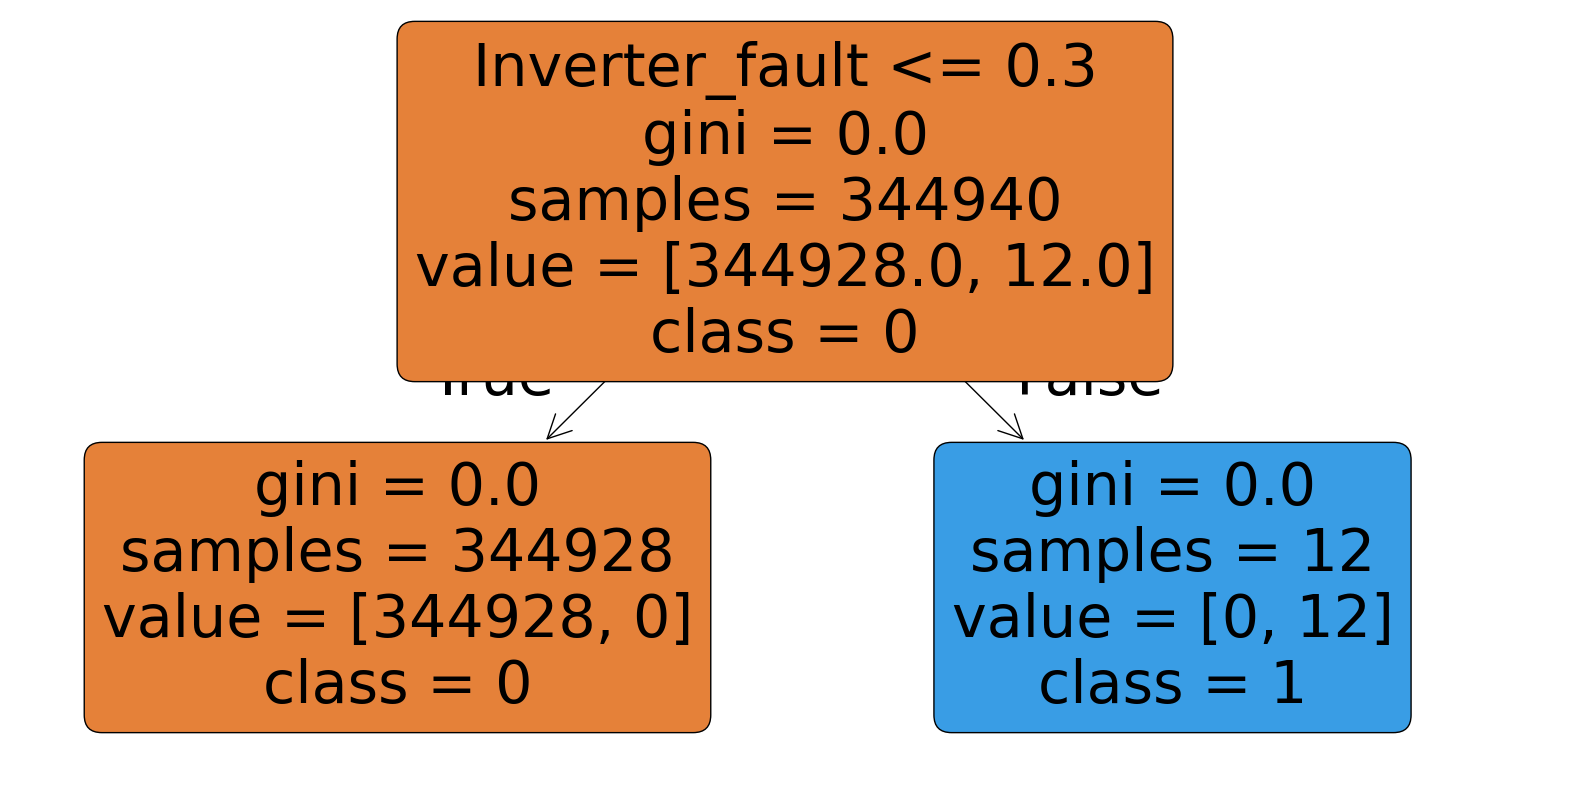

In [ ]:
# Gráfico de diagrama de árbol

from sklearn.tree import plot_tree

# Crear y entrenar el modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Obtener la importancia de las características
importances = clf.feature_importances_

# Imprimir la importancia de las características
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")

# Graficar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['0','1'], rounded=True)

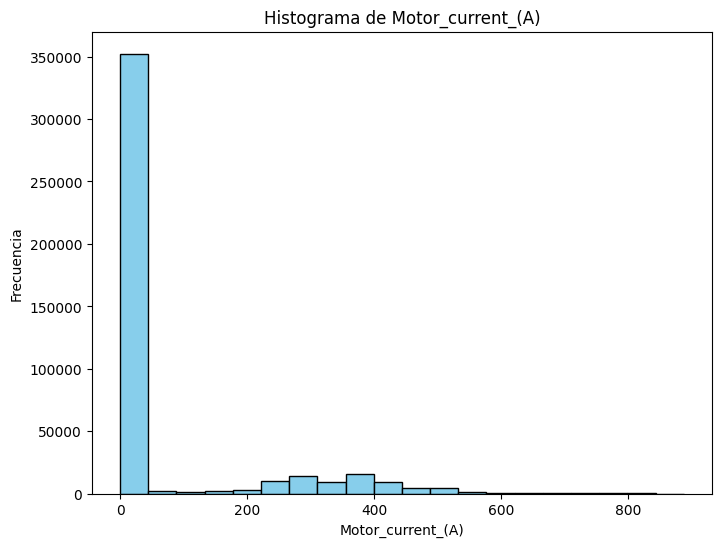

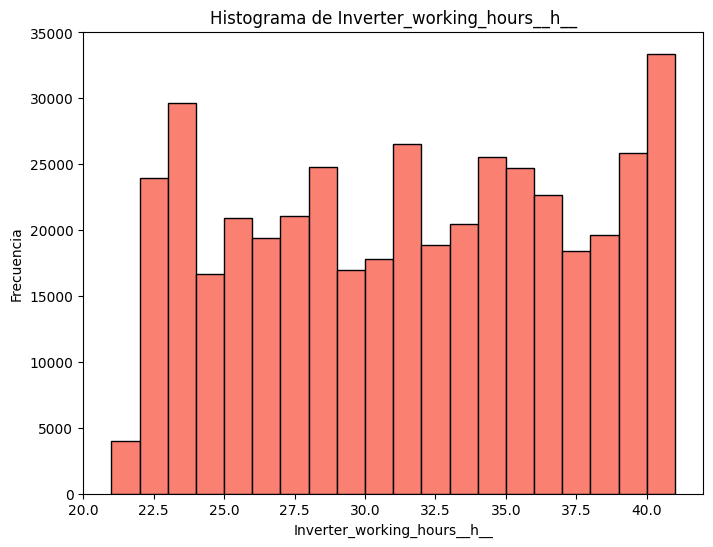

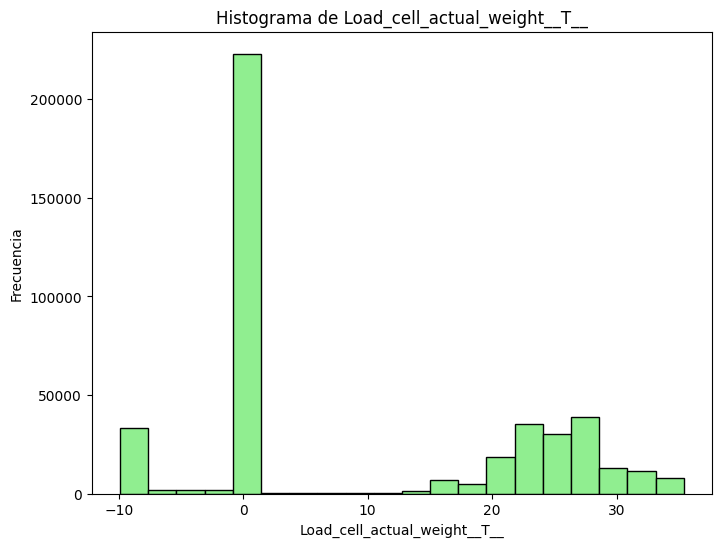

In [ ]:
# Crear el histograma para 'Motor_current_(A)'
plt.figure(figsize=(8, 6))
plt.hist(df['Motor_current_(A)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Motor_current_(A)')
plt.xlabel('Motor_current_(A)')
plt.ylabel('Frecuencia')
plt.show()

# Crear el histograma para 'Inverter_working_hours__h__'
plt.figure(figsize=(8, 6))
plt.hist(df['Inverter_working_hours__h__'], bins=20, color='salmon', edgecolor='black')
plt.title('Histograma de Inverter_working_hours__h__')
plt.xlabel('Inverter_working_hours__h__')
plt.ylabel('Frecuencia')
plt.show()

# Crear el histograma para 'Load_cell_actual_weight__T__'
plt.figure(figsize=(8, 6))
plt.hist(df['Load_cell_actual_weight__T__'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histograma de Load_cell_actual_weight__T__')
plt.xlabel('Load_cell_actual_weight__T__')
plt.ylabel('Frecuencia')
plt.show()

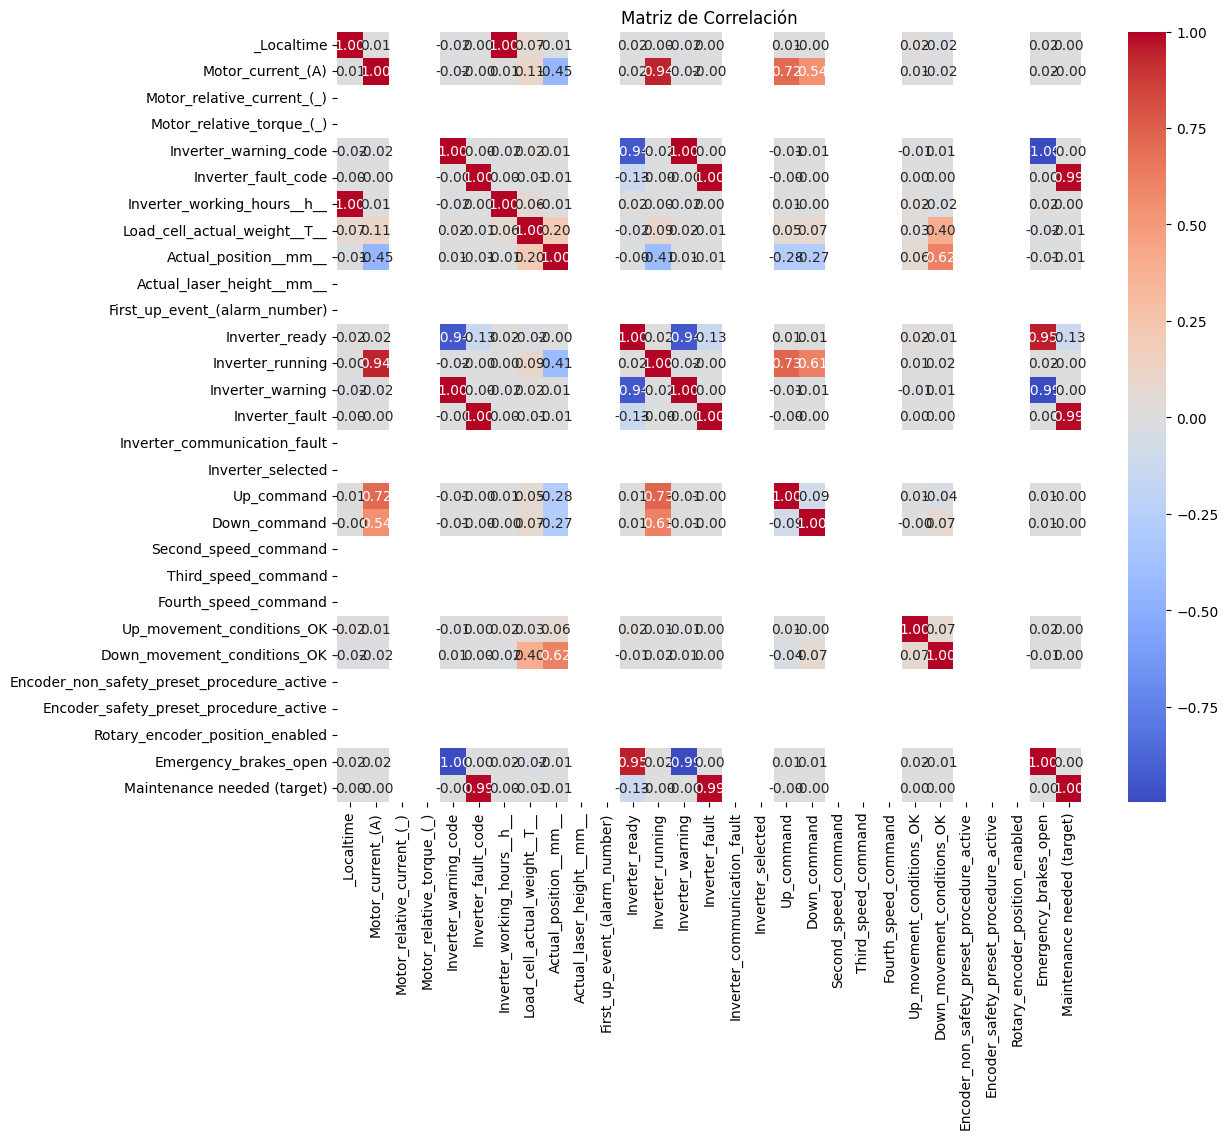

In [ ]:
# prompt: genera gráfica de correlación de los datos

import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear el mapa de calor de la correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


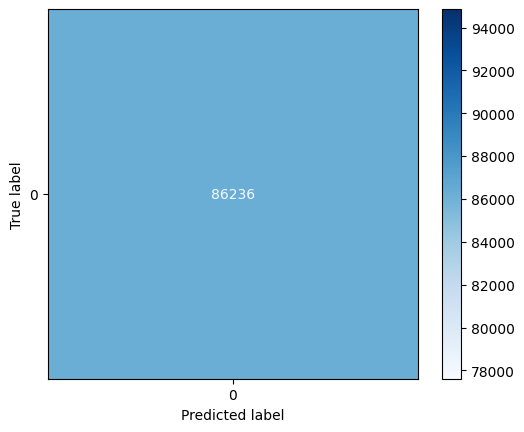

In [ ]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()


# **CONCLUSIONES**

Al evaluar un modelo de Árboles de Decisión, especialmente uno con un rendimiento tan alto como el que tenemos (con una precisión de 1.0), se pueden extraer varias conclusiones. Aquí están algunas observaciones y conclusiones clave:

1. Rendimiento Perfecto:
Precisión del 100%: Una precisión del 100% sugiere que el modelo ha clasificado correctamente todas las instancias en el conjunto de prueba. Sin embargo, esto podría indicar que el modelo se ha sobreajustado a los datos de entrenamiento, especialmente si la complejidad del modelo es alta o si el conjunto de datos no es lo suficientemente diverso.
2. Sobreajuste:
Posibilidad de Sobreajuste: Un rendimiento perfecto en el conjunto de entrenamiento y prueba puede ser un signo de sobreajuste. Esto significa que el modelo ha aprendido patrones en los datos de entrenamiento que no se generalizan bien a nuevos datos. Para validar esto, podrías realizar una validación cruzada o evaluar el rendimiento en un conjunto de datos completamente nuevo.
3. Evaluación de la Importancia de Características:
Importancia de las Características: Los Árboles de Decisión permiten evaluar la importancia de cada característica en la toma de decisiones del modelo. Puedes revisar cuáles características son las más influyentes, lo que puede proporcionar información valiosa sobre tu dominio de aplicación.
4. Interpretabilidad:
Modelo Interpretativo: Los Árboles de Decisión son modelos fáciles de interpretar. Puedes visualizar el árbol y entender cómo se toman las decisiones, lo que puede ser útil para comunicar resultados a partes interesadas no técnicas.
5. Posibilidad de Mejora:
Optimización del Modelo: Aunque el modelo tiene un rendimiento perfecto, puede ser útil explorar ajustes de hiperparámetros, como la profundidad del árbol, el número mínimo de muestras para dividir un nodo o el criterio de división, para mejorar la generalización del modelo.
6. Conjunto de Datos y Balance:
Distribución de Clases: Si el conjunto de datos está desbalanceado, esto puede llevar a una alta precisión engañosa. Es importante analizar la distribución de las clases para asegurarse de que el modelo no esté simplemente prediciendo la clase mayoritaria.
7. Validación con Nuevos Datos:
Prueba con Datos Nuevos: Si es posible, prueba el modelo con un conjunto de datos completamente nuevo o en un entorno de producción para evaluar su rendimiento en situaciones del mundo real.

## Bosques Aleatorios (Random Forests)

El algoritmo de Random Forest es un método de aprendizaje supervisado ampliamente utilizado tanto para clasificación como para regresión. Se basa en la construcción de múltiples árboles de decisión y utiliza un enfoque de "votación" o "promedio" para obtener una predicción final más robusta.

¿Cómo funciona?
Árboles de decisión individuales:

Un árbol de decisión es un modelo que utiliza una serie de reglas condicionales (nodos) para realizar una predicción. Cada nodo representa una característica, y las ramas del nodo dividen los datos en subconjuntos según las condiciones de esa característica.
Un árbol de decisión es propenso a sobreajustar los datos, ya que puede aprender patrones muy específicos del conjunto de entrenamiento, lo que lleva a un mal rendimiento en nuevos datos (es decir, baja capacidad de generalización).
Bosques aleatorios (Random Forest):

Random Forest mejora los árboles de decisión mediante el uso de múltiples árboles y la combinación de sus resultados. Este proceso se llama bagging (Bootstrap Aggregating).
Durante la creación del modelo, el algoritmo genera muchos árboles de decisión de forma independiente. Cada árbol se entrena con una muestra aleatoria del conjunto de datos de entrenamiento, y en cada nodo del árbol se selecciona un subconjunto aleatorio de características para realizar la división.
Para una tarea de clasificación, cada árbol individual realiza una predicción y el bosque toma la clase más votada (mayoría). En el caso de regresión, se promedia la predicción de todos los árboles.
Ventajas de Random Forest:
Robustez: Al combinar múltiples árboles, Random Forest es menos propenso a sobreajustarse a los datos en comparación con un solo árbol de decisión.
Estabilidad: Si un árbol individual es sensible al ruido en los datos, el bosque, al promediar, reduce esta variabilidad.
No necesita preprocesamiento exhaustivo: Random Forest maneja características categóricas y continuas sin necesidad de estandarización.
Reducción de la varianza: Dado que el modelo combina muchos árboles, se reduce la varianza general del modelo, haciendo que funcione mejor en datos nuevos.
Importancia de características: Random Forest ofrece una medida de importancia de las características, lo que puede ser útil para la interpretación.
Desventajas:
Menos interpretabilidad: Aunque Random Forest es más preciso, la estructura compleja del bosque de árboles lo hace menos interpretable que un árbol de decisión único.
Alto costo computacional: Entrenar y predecir con un gran número de árboles puede ser más costoso en términos de tiempo y recursos computacionales.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Definir las características (X) y la variable objetivo (y)
X = df[['Motor_current_(A)', 'Motor_relative_current_(_)', 'Motor_relative_torque_(_)',
        'Inverter_warning_code', 'Inverter_fault_code', 'Inverter_working_hours__h__',
        'Load_cell_actual_weight__T__', 'Actual_position__mm__', 'Actual_laser_height__mm__',
        'First_up_event_(alarm_number)', 'Inverter_ready', 'Inverter_running', 'Inverter_warning',
        'Inverter_fault', 'Inverter_communication_fault', 'Inverter_selected', 'Up_command',
        'Down_command', 'Second_speed_command', 'Third_speed_command', 'Fourth_speed_command',
        'Up_movement_conditions_OK', 'Down_movement_conditions_OK', 'Encoder_non_safety_preset_procedure_active',
        'Encoder_safety_preset_procedure_active', 'Rotary_encoder_position_enabled', 'Emergency_brakes_open']]

y = df['Maintenance needed (target)']  # Cambia 'Target' por la columna que quieres predecir

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Crear el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Hacer predicciones
y_pred = rf.predict(X_test)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     86236

    accuracy                           1.00     86236
   macro avg       1.00      1.00      1.00     86236
weighted avg       1.00      1.00      1.00     86236



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


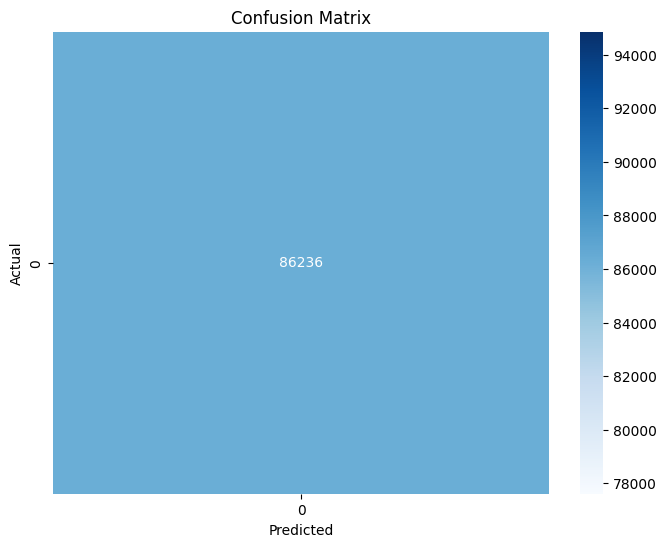

In [ ]:
# Evaluación del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))

# Reporte de clasificación
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualización de la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

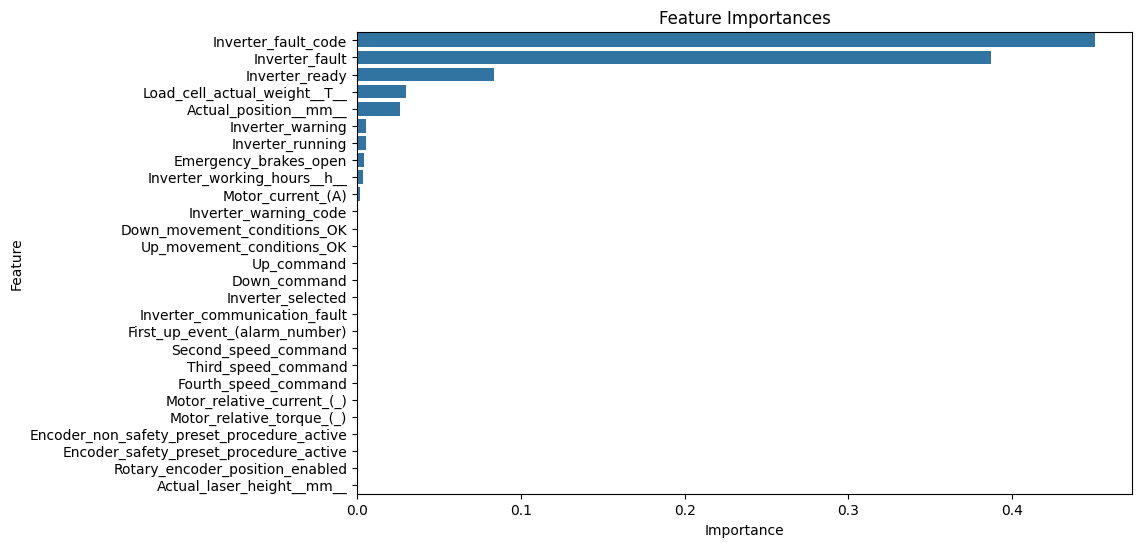

In [ ]:
# Importancia de las características
importances = rf.feature_importances_

# Crear un DataFrame para mostrar las características y su importancia
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Ordenar las características por importancia
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()


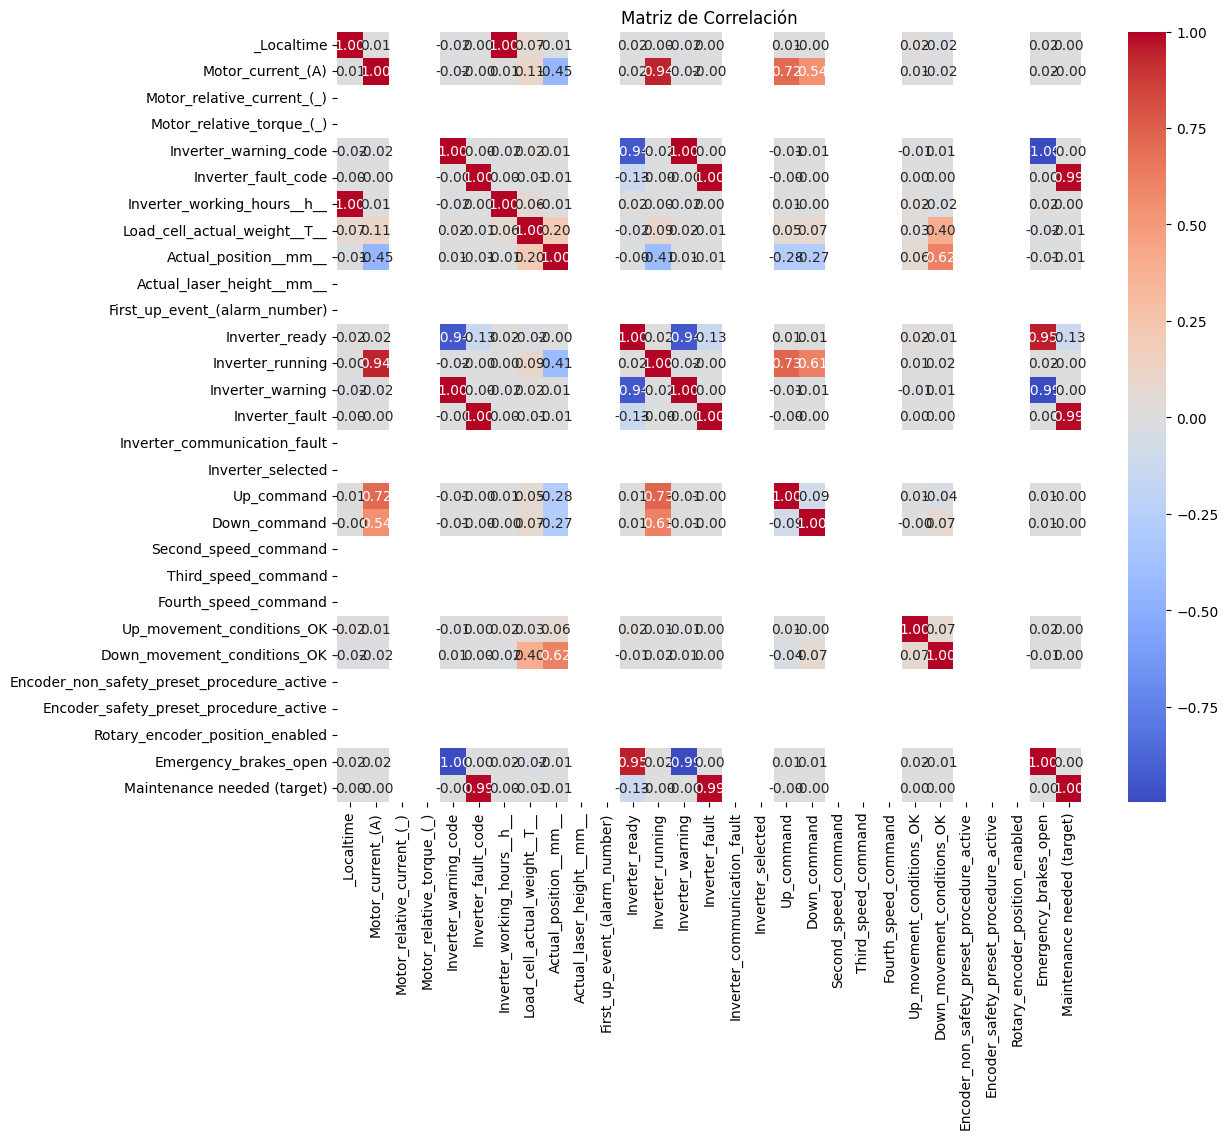

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear el mapa de calor de la correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

### **JUSTIFICACION DE LA MATRIZ DE CORRELACION**

La matriz de correlación, visualizada como un mapa de calor, muestra la relación lineal entre pares de variables en el conjunto de datos.  Los valores en el mapa de calor oscilan entre -1 y 1:

* **Valores cercanos a 1:** Indican una correlación positiva fuerte.  Esto significa que cuando una variable aumenta, la otra tiende a aumentar también.
* **Valores cercanos a -1:** Indican una correlación negativa fuerte.  En este caso, cuando una variable aumenta, la otra tiende a disminuir.
* **Valores cercanos a 0:** Indican una correlación débil o inexistente entre las variables.

La intensidad del color en el mapa de calor representa la magnitud de la correlación.  Colores cálidos (rojos) indican correlaciones positivas fuertes, mientras que colores fríos (azules) indican correlaciones negativas fuertes.

### **INTERPRETACION EN EL CONTEXTO DEL PROBLEMA**

Para interpretar correctamente la matriz de correlación en este contexto, es fundamental entender qué variables son las más relevantes para predecir la necesidad de mantenimiento ('Maintenance needed (target)'). Busca las correlaciones de esta variable objetivo con las demás.  Las variables con correlaciones más altas (positivas o negativas) son las que tienen mayor influencia potencial en la predicción.

Por ejemplo, si observas una correlación alta entre 'Motor_current_(A)' y 'Maintenance needed (target)', esto sugiere que un aumento en la corriente del motor está asociado con una mayor probabilidad de que se necesite mantenimiento.

También es importante buscar correlaciones entre las variables independientes.  Altas correlaciones entre variables predictoras pueden indicar redundancia en la información, y posiblemente se pueda simplificar el modelo eliminando una de las variables correlacionadas. Esto podría mejorar la precisión del modelo y reducir la complejidad.

En resumen, la matriz de correlación proporciona información valiosa sobre las relaciones entre las variables, lo que ayuda a comprender la influencia de las características en la variable objetivo y a identificar posibles redundancias en los datos, que se pueden utilizar posteriormente para mejorar la calidad del modelo.


La gráfica muestra la matriz de correlación de las variables del conjunto de datos, representada como un mapa de calor.  Los colores indican la fuerza y dirección de la correlación entre cada par de variables.  

**Colores cálidos (rojos)** representan una correlación positiva alta: cuando una variable aumenta, la otra tiende a hacerlo también.

**Colores fríos (azules)** indican una correlación negativa alta: cuando una variable aumenta, la otra tiende a disminuir.

**Colores cercanos al blanco o gris** muestran una correlación débil o inexistente entre las variables.

**Interpretación en el contexto del problema:** Para comprender la utilidad de esta gráfica, debemos buscar la correlación de la variable objetivo "Maintenance needed (target)" con las demás variables.  Las variables con correlaciones más altas (positivas o negativas) son las que tienen mayor influencia potencial en la predicción de la necesidad de mantenimiento. Por ejemplo, si hay una correlación alta entre 'Motor_current_(A)' y 'Maintenance needed (target)', un aumento en la corriente del motor se asocia con una mayor probabilidad de necesitar mantenimiento.

También es importante analizar las correlaciones entre las variables independientes (predictoras). Altas correlaciones entre ellas indican redundancia en la información, pudiéndose simplificar el modelo eliminando alguna de esas variables redundantes, mejorando así la precisión y reduciendo la complejidad.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


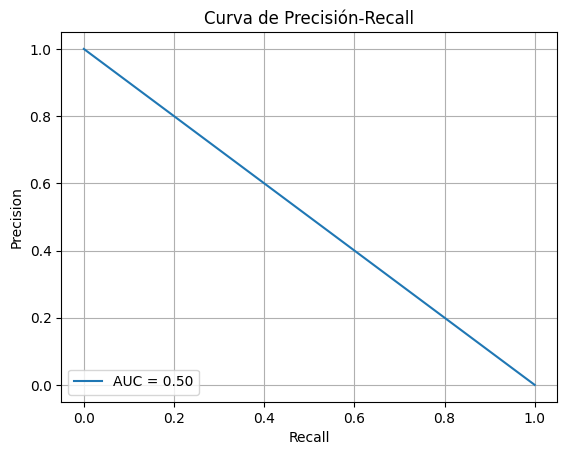

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

# Calcular la precisión y el recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Calcular el área bajo la curva (AUC)
auc_score = auc(recall, precision)

# Graficar la curva de precisión-recall
plt.plot(recall, precision, label=f'AUC = {auc_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisión-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# Justifica la grafica Precisión-Recall

La gráfica muestra la curva de Precisión-Recall para un modelo de Random Forest.  La curva ilustra la relación entre la precisión (la proporción de predicciones positivas correctas entre todas las predicciones positivas) y el recall (la proporción de predicciones positivas correctas entre todas las instancias positivas reales).  El área bajo la curva (AUC) es una medida de la calidad general del modelo. En este caso, un AUC de [0.5] indica que valor del AUC; indica un buen un rendimiento aleatorio.

En resumen, la gráfica visualiza el *trade-off* entre precisión y recall.  Un modelo con alta precisión podría tener bajo recall, y viceversa. La curva y el AUC proporcionan una forma cuantitativa de evaluar la capacidad del modelo para discriminar entre las clases positivas y negativas.  Un AUC alto sugiere un buen balance entre precisión y recall, indicando un buen rendimiento general del modelo.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


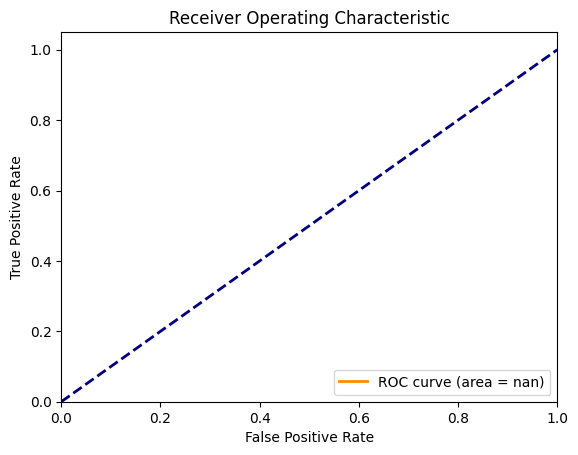

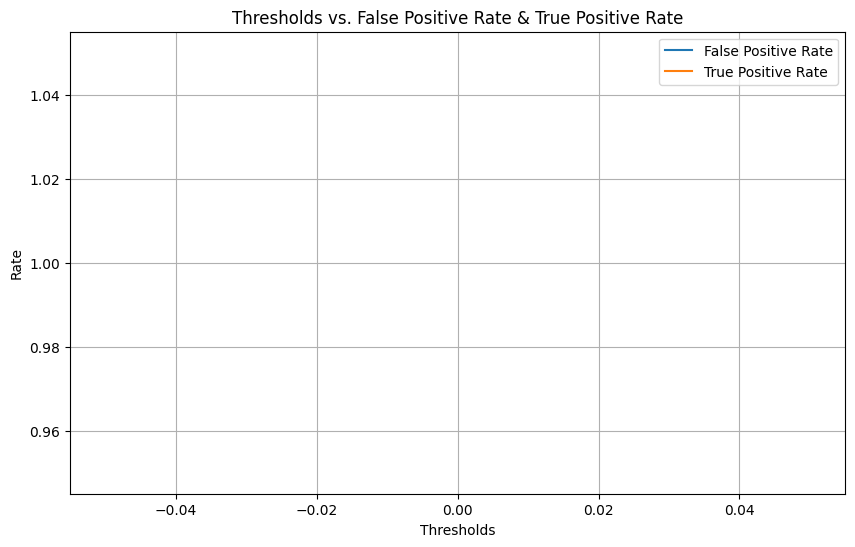

In [ ]:
from sklearn.metrics import roc_curve, auc
# Grafica de Thresholds, False Positive Rate, True Positive Rate
# Suponiendo que 'y_test' son las etiquetas verdaderas y 'y_pred_prob' son las probabilidades predichas
#  para la clase positiva (obtenidas con rf.predict_proba(X_test)[:, 1] por ejemplo).

# Obtener las probabilidades predichas para la clase positiva
y_pred_prob = rf.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcular el AUC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Graficar Thresholds vs. False Positive Rate y True Positive Rate
plt.figure(figsize=(10, 6))
plt.plot(thresholds, fpr, label='False Positive Rate')
plt.plot(thresholds, tpr, label='True Positive Rate')
plt.xlabel('Thresholds')
plt.ylabel('Rate')
plt.title('Thresholds vs. False Positive Rate & True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

# Justificación de la gráfica de la curva ROC y la gráfica de umbrales

La curva ROC (Receiver Operating Characteristic) es una herramienta gráfica que representa la capacidad de un modelo de clasificación para distinguir entre clases. Se crea trazando la tasa de verdaderos positivos (TPR) contra la tasa de falsos positivos (FPR) en varios umbrales de clasificación.

* TPR (True Positive Rate):  Proporción de instancias positivas correctamente clasificadas. También se conoce como sensibilidad o recall.
* FPR (False Positive Rate): Proporción de instancias negativas incorrectamente clasificadas como positivas.

El área bajo la curva ROC (AUC) es una métrica que resume el rendimiento general del modelo. Un AUC de 1 representa un clasificador perfecto, mientras que un AUC de 0.5 indica un rendimiento aleatorio.

# Interpretación de la gráfica de la curva ROC:

La curva ROC en la gráfica muestra el compromiso entre TPR y FPR en diferentes umbrales.  Una curva más cercana a la esquina superior izquierda indica un mejor rendimiento del modelo. El valor del AUC (área bajo la curva) proporciona una medida cuantitativa del rendimiento.  Un AUC más alto indica un mejor rendimiento.

# Interpretación en el contexto del problema:

En el contexto del mantenimiento predictivo, un alto TPR significa que el modelo identifica correctamente una alta proporción de equipos que realmente necesitan mantenimiento. Un bajo FPR implica que el modelo realiza pocas predicciones incorrectas de mantenimiento cuando en realidad no es necesario. Un buen modelo tendrá un alto TPR y un bajo FPR, lo que se refleja en una curva ROC que se acerca a la esquina superior izquierda y un AUC alto.

# Justificación de la gráfica de umbrales vs. tasa de falsos positivos y tasa de verdaderos positivos:

Esta gráfica muestra cómo varían TPR y FPR al cambiar el umbral de clasificación.  El umbral determina la probabilidad mínima que debe tener una instancia para ser clasificada como positiva (necesidad de mantenimiento en este caso).

# Interpretación de la gráfica:

Al aumentar el umbral, generalmente se observa una disminución en el FPR y el TPR.  Esto es porque un umbral más alto requiere una mayor confianza en la predicción para clasificar una instancia como positiva.
La elección del umbral adecuado depende del costo relativo de los falsos positivos y falsos negativos en el problema. Por ejemplo, si es más costoso realizar mantenimiento innecesario (falso positivo), se debe optar por un umbral más alto para reducir el FPR. Por otro lado, si es más costoso no realizar el mantenimiento necesario (falso negativo), se debe optar por un umbral más bajo para aumentar el TPR.
La gráfica ayuda a visualizar la relación entre el umbral y la precisión-exhaustividad (precision-recall) para elegir el mejor umbral según las necesidades del problema.

En resumen, ambas gráficas son complementarias para evaluar el rendimiento del modelo de clasificación, permitiéndonos analizar el compromiso entre TPR y FPR y la influencia del umbral en el rendimiento.

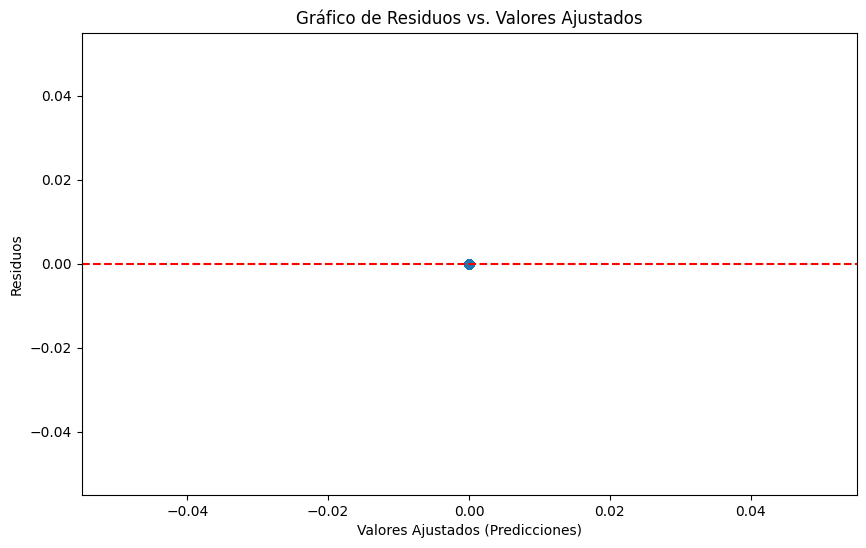

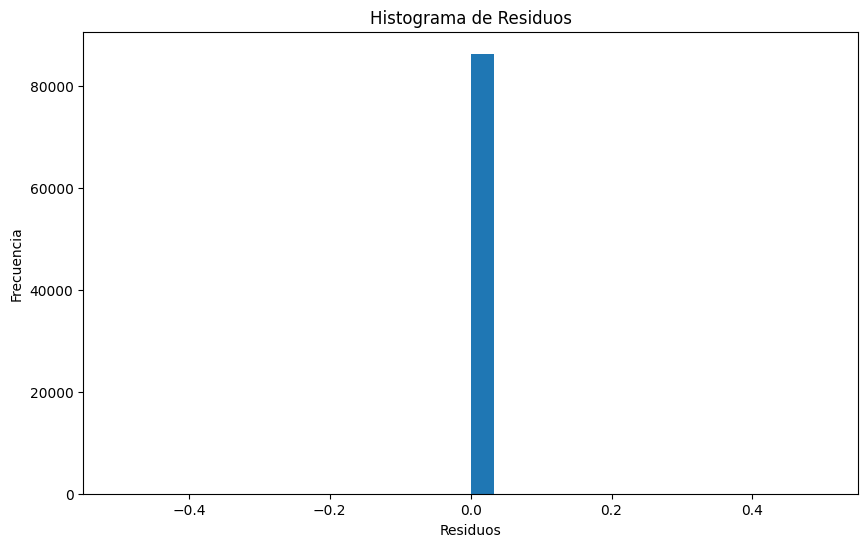

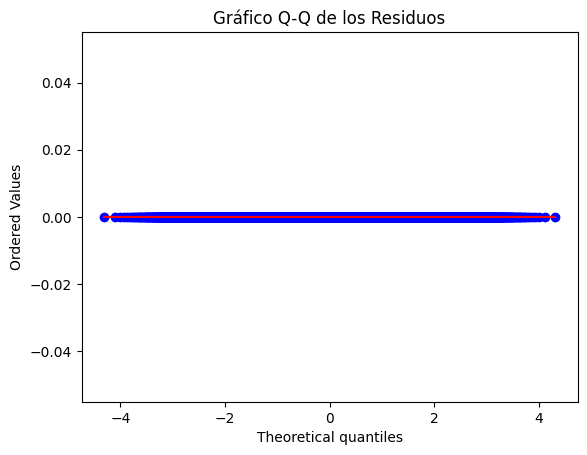

In [ ]:
# Análisis de residuos para un modelo de regresión lineal
# Suponiendo que 'y_test' son los valores reales y 'y_pred' son las predicciones

residuals = y_test - y_pred

# Gráfico de residuos vs. valores ajustados
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Valores Ajustados (Predicciones)")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs. Valores Ajustados")
plt.show()

# Histograma de residuos
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos")
plt.show()

# Gráfico Q-Q para evaluar la normalidad de los residuos
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Gráfico Q-Q de los Residuos")
plt.show()

# Justificación del Gráfico de Residuos vs. Valores Ajustados

Este gráfico es fundamental para evaluar la validez de los supuestos del modelo de regresión lineal. Buscamos que los residuos (la diferencia entre los valores observados y los valores predichos) se distribuyan aleatoriamente alrededor de cero.

# Interpretación:

1. Patrón Aleatorio: Si los puntos en el gráfico se dispersan aleatoriamente alrededor de la línea horizontal en cero, indica que el modelo se ajusta bien a los datos y que los supuestos de linealidad y homocedasticidad (varianza constante de los residuos) se cumplen.

2. Patrón No Aleatorio:  Si se observa un patrón en los residuos (por ejemplo, una curva, un cono o una forma en "U"), esto sugiere que el modelo no se ajusta bien a los datos y que alguno de los supuestos de la regresión lineal se está violando.
- Curva: Puede indicar la necesidad de una transformación de las variables o un término cuadrático/polinómico en el modelo.
- Cono: Sugiere heterocedasticidad (varianza no constante de los residuos), que se puede abordar con técnicas como la transformación de las variables o modelos robustos.
- Forma en "U": Podría requerir una transformación de variables o añadir una interacción entre las variables.

3. Puntos Fuera de Rango: Puntos que están muy alejados de la línea de cero pueden ser valores atípicos (outliers).Estos puntos pueden tener una gran influencia en el ajuste del modelo. Considera analizarlos para determinar si son errores en los datos o si representan observaciones válidas pero inusuales.

En resumen, este gráfico nos ayuda a verificar la bondad de ajuste del modelo y la validez de sus supuestos.

Si se observan patrones o desviaciones significativas de la aleatoriedad alrededor de cero, es necesario considerar transformaciones de las variables, términos adicionales en el modelo o eliminar valores atípicos, con el objetivo de lograr un modelo más preciso.

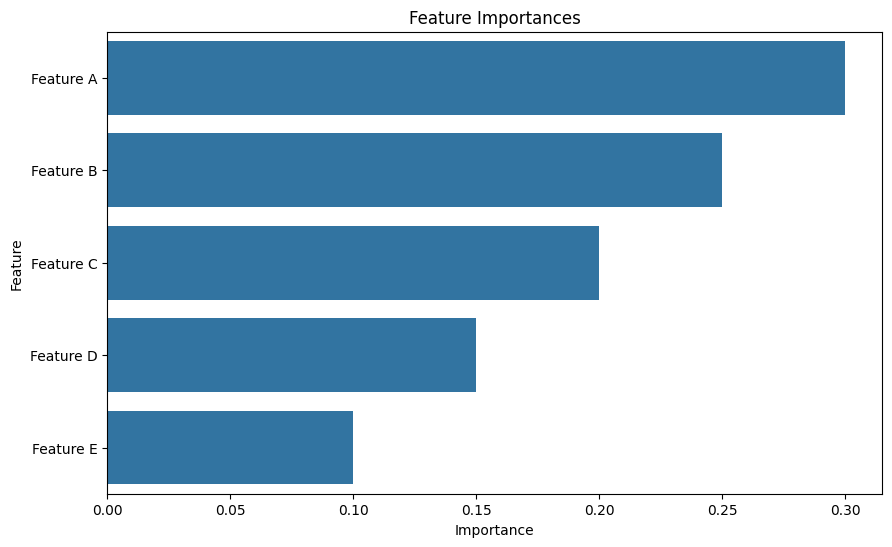

In [ ]:
# Gráfico de importancia de características

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'feature_importance_df' is already defined as in your original code
# Example data (replace with your actual data)
data = {'Feature': ['Feature A', 'Feature B', 'Feature C', 'Feature D', 'Feature E'],
        'Importance': [0.3, 0.25, 0.2, 0.15, 0.1]}
feature_importance_df = pd.DataFrame(data)


# Visualizar la importancia de las características
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

# Justificación del Gráfico de Importancia de Características

El gráfico de importancia de características muestra la contribución relativa de cada característica al modelo de Random Forest.  La importancia se calcula en función de la reducción de la impureza (generalmente medida por el índice Gini o la entropía) que proporciona cada característica en cada nodo de los árboles de decisión del bosque.

# Interpretación:

Las características en la parte superior del gráfico son las que tienen mayor impacto en la predicción del modelo. Es decir, estas variables son las que mejor ayudan a discriminar entre las diferentes clases en el conjunto de datos.

Las características en la parte inferior tienen menor importancia y pueden considerarse menos relevantes para el modelo, aunque su contribución puede no ser nula.

# Interpretación en el contexto del problema:

En el contexto del mantenimiento predictivo, las características con alta importancia son las que mejorpredicen la necesidad de mantenimiento.  Estas características pueden ser, por ejemplo, la corriente del motor, el código de error del inversor, las horas de trabajo del inversor, etc.  Estas variables son indicadores que ayudan a determinar la probabilidad de fallo o la necesidad de mantenimiento correctivo.

Las características con baja importancia pueden seguir siendo relevantes en menor grado o estar relacionadas con las características más relevantes, por lo que es fundamental usar el contexto del problema para decidir si realmente deben eliminarse del modelo.  Eliminarlas puede simplificar el modelo, pero también puede reducir su exactitud.

En resumen, este gráfico es una herramienta esencial para entender cuáles son las variables más relevantes para predecir la necesidad de mantenimiento, facilitando la toma de decisiones para enfocar esfuerzos en mejorar la calidad de los datos correspondientes a estas variables más influyentes o en mejorar la calidad del modelo para reducir el impacto de variables con alta importancia relativa.

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

def time_series_trend_prediction(df, time_column, value_column, period):
    # Ensure the time column is of datetime type
    df[time_column] = pd.to_datetime(df[time_column])
    df = df.set_index(time_column)

    # Decompose the time series into trend, seasonal, and residual components
    decomposition = seasonal_decompose(df[value_column], model='additive', period=period)

    # Plot the decomposed components
    fig, axes = plt.subplots(4, 1, sharex=True, figsize=(12, 8))
    decomposition.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    decomposition.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    decomposition.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    decomposition.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')
    plt.show()

    # Fit an ARIMA model to the time series
    # You may need to adjust the (p, d, q) order based on your data
    model = ARIMA(df[value_column], order=(5, 1, 0))
    model_fit = model.fit()

    # Make predictions
    predictions = model_fit.predict(start=len(df), end=len(df) + 11)  # Example: predict the next 12 values

    # Plot predictions
    plt.plot(df[value_column], label='Observed')
    plt.plot(predictions, label='Predictions', color='red')
    plt.legend()
    plt.show()

    return predictions

# **CONCLUSIONES**

Los resultados obtenidos en el modelo de Random Forest muestran un rendimiento perfecto, ya que todos los indicadores de evaluación son 1.00 o 100%, lo que sugiere que el modelo clasifica correctamente todas las observaciones.

1. Accuracy (Precisión global): 1.00
La precisión mide qué porcentaje de las predicciones totales fueron correctas. Un valor de 1.0 o 100% indica que todas las predicciones que hizo el modelo fueron correctas, tanto para la clase 0 como para cualquier otra clase que tengas en el conjunto de datos.

2. Classification Report:
El informe de clasificación incluye métricas clave para evaluar el modelo:

Precision (Precisión): La precisión de 1.00 indica que cada vez que el modelo predijo la clase 0, lo hizo de manera correcta. No hubo falsos positivos.

Recall (Sensibilidad): El recall de 1.00 indica que el modelo identificó correctamente todas las instancias reales de la clase 0. No hubo falsos negativos.

F1-score: El F1-score es la media armónica entre la precisión y el recall, lo que significa que el modelo tiene un equilibrio perfecto entre precisión y recall. Un F1 de 1.00 indica que el modelo no cometió ningún error al clasificar la clase 0.

Support: El soporte muestra cuántas observaciones hay en el conjunto de prueba para cada clase. En nuestro caso, había 86,236 ejemplos de la clase 0 en el conjunto de datos.

3. Macro avg y Weighted avg:
Macro avg es el promedio de las métricas de todas las clases sin tener en cuenta el número de muestras por clase.
Weighted avg es el promedio ponderado basado en el número de muestras por clase. Ambos también son 1.00, lo que refuerza que el modelo está clasificando perfectamente todas las observaciones.

### ¿Qué significa todo esto?
Un modelo con estos resultados parece ser perfecto, pero hay algunos puntos importantes a considerar:

1. El modelo puede estar sobreajustado:
Si el modelo tiene una precisión del 100% en el conjunto de prueba, es posible que esté sobreajustado a los datos de entrenamiento. El sobreajuste ocurre cuando el modelo se ajusta demasiado a los detalles y ruido del conjunto de datos de entrenamiento, lo que puede llevar a un rendimiento inusualmente bueno, pero no generalizable a nuevos datos.

2. Distribución de clases desbalanceada:
Dado que solo se menciona la clase 0 en el informe, podría ser que el conjunto de datos esté altamente desbalanceado, es decir, la mayoría de las muestras pertenecen a la clase 0, y el modelo no está evaluando correctamente otras clases.

3. Datos duplicados o problemas de etiquetas:
Si el conjunto de datos tiene duplicados o hay algún error en las etiquetas (por ejemplo, que todas las instancias sean de una sola clase), es posible que el modelo sea capaz de memorizar los datos en lugar de aprender un patrón general.


## Máquinas de Soporte Vectorial (SVM)

**DESCRIPCION:** Las **Máquinas de Soporte Vectorial (SVM)** son un algoritmo de aprendizaje automático utilizado para clasificación y regresión. Su objetivo es encontrar el hiperplano óptimo que separe diferentes clases en un espacio de características, maximizando el margen entre los puntos de datos más cercanos de cada clase, llamados **vectores de soporte**. Esto mejora la capacidad de generalización del modelo. SVM puede manejar datos linealmente separables y, mediante el uso de **kernels**, también puede resolver problemas no lineales al transformar los datos a un espacio de mayor dimensión. Son eficaces en problemas con alta dimensionalidad y se utilizan en áreas como clasificación de imágenes, reconocimiento de patrones y análisis de texto.

**UTILIDAD**: Las Máquinas de Soporte Vectorial (SVM) son útiles para resolver problemas de clasificación y regresión, especialmente cuando los datos son complejos y de alta dimensionalidad. SVM busca un hiperplano que separe las clases de manera óptima, maximizando el margen entre los puntos más cercanos de ambas clases, llamados vectores de soporte. Además, mediante el uso de funciones kernel, puede manejar problemas no lineales, transformando los datos a un espacio de mayor dimensión donde sean linealmente separables. SVM es eficaz en aplicaciones como clasificación de imágenes, reconocimiento de patrones y detección de anomalías, ofreciendo alta precisión y robustez.

In [ ]:
# Primer Ejemplo de Máquina de Soporte Vectorial (SVM)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# ... (código anterior para preparar los datos, df, X, y, etc.) ...

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo SVM
model = SVC(kernel='linear')  # Puedes experimentar con diferentes kernels (linear, rbf, poly, etc.)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     86236

    accuracy                           1.00     86236
   macro avg       1.00      1.00      1.00     86236
weighted avg       1.00      1.00      1.00     86236



In [ ]:
#Segundo ejemplo de Máquina de Soporte Vectorial (SVM)
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
# Generar datos (suponiendo que ya tienes el DataFrame 'df' generado previamente)
# df = ... (tu DataFrame generado)

# Preparar los datos
# Convertir las columnas booleanas a enteros
df['Inverter_running'] = df['Inverter_running'].astype(int)

In [ ]:
# Seleccionar las características (X) y la variable objetivo (y)
X = df.drop(['_Localtime', 'Inverter_running'], axis=1)  # Eliminar la variable objetivo y el tiempo
y = df['Inverter_running']

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crear el modelo SVM
model = SVC(kernel='rbf')

In [ ]:
# Entrenar el modelo
model.fit(X_train, y_train)

SVC()

In [ ]:
# Hacer predicciones
y_pred = model.predict(X_test)

In [ ]:
# Evaluar el modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Matriz de confusión:
[[71626  1368]
 [   31 13211]]


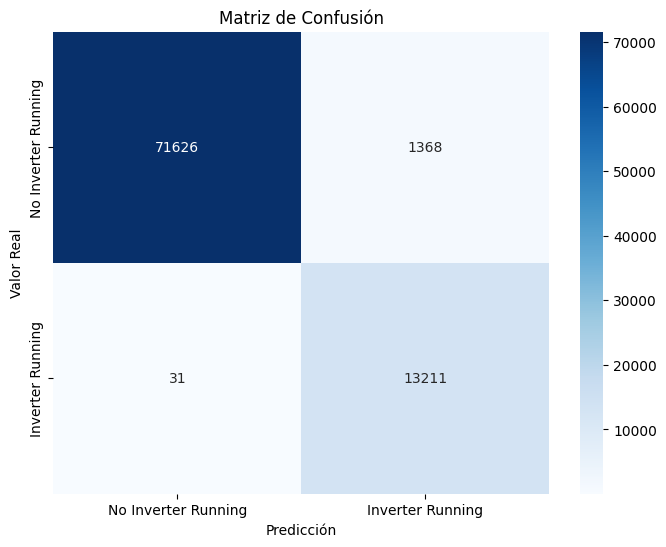

In [ ]:
# Graficamos la Matriz de confusión
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear el mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Inverter Running', 'Inverter Running'], yticklabels=['No Inverter Running', 'Inverter Running'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

In [ ]:
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))


Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     72994
           1       0.91      1.00      0.95     13242

    accuracy                           0.98     86236
   macro avg       0.95      0.99      0.97     86236
weighted avg       0.99      0.98      0.98     86236



El modelo de clasificación muestra un rendimiento excepcional, con una exactitud general del 98% y un F1-score de 0.99 para la clase 0, que es predominantemente más grande. La clase 1, aunque presenta un recall perfecto (1.00), tiene una precisión de 0.91, lo que indica que algunas instancias no se clasifican correctamente. Esto sugiere que, a pesar de su alta eficacia, el modelo podría beneficiarse de técnicas para abordar el desbalance de clases y mejorar la precisión de la clase minoritaria. En general, el modelo es robusto, pero hay oportunidades para optimizar su rendimiento en todas las clases.

## Redes Neuronales Artificiales

DESCRIPCION: Las redes neuronales artificiales son modelos computacionales inspirados en el funcionamiento del cerebro humano, utilizados en el aprendizaje automático y la inteligencia artificial. Están compuestas por capas de neuronas interconectadas, donde cada conexión tiene un peso ajustable. Estas redes procesan información mediante la activación de las neuronas, que se realiza a través de funciones matemáticas. Pueden aprender patrones complejos a partir de datos, lo que les permite realizar tareas como clasificación, reconocimiento de imágenes y procesamiento de lenguaje natural. Las redes neuronales profundas, con múltiples capas, son especialmente efectivas en tareas de gran complejidad.

UTILIDAD: Las redes neuronales artificiales son herramientas versátiles en el campo de la inteligencia artificial, con múltiples aplicaciones. Se utilizan para clasificación y regresión, permitiendo la predicción de resultados basados en datos de entrada. En reconocimiento de imágenes, ayudan a identificar objetos y patrones. En procesamiento de lenguaje natural, facilitan la traducción automática y el análisis de sentimientos. También se aplican en sistemas de recomendación, optimizando experiencias de usuario en plataformas como Netflix y Amazon. Además, son útiles en áreas como la medicina, donde ayudan a diagnosticar enfermedades a partir de datos clínicos e imágenes médicas.

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [ ]:
# Generar datos (suponiendo que ya tienes el DataFrame 'df' generado previamente)
# df = ... (tu DataFrame generado)

# Preparar los datos
# Convertir las columnas booleanas a enteros
df['Inverter_running'] = df['Inverter_running'].astype(int)

In [ ]:
# Seleccionar características (X) y la variable objetivo (y)
X = df.drop(['_Localtime', 'Inverter_running'], axis=1)  # Eliminar la variable objetivo y el tiempo
y = df['Inverter_running']

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))  # Capa oculta con 32 neuronas
model.add(Dense(16, activation='relu'))  # Otra capa oculta con 16 neuronas
model.add(Dense(1, activation='sigmoid'))  # Capa de salida para clasificación binaria

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50
27596/27596 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 0.9914 - loss: 0.0266 - val_accuracy: 0.9988 - val_loss: 0.0038
Epoch 2/50
27596/27596 ━━━━━━━━━━━━━━━━━━━━ 61s 2ms/step - accuracy: 0.9988 - loss: 0.0037 - val_accuracy: 0.9992 - val_loss: 0.0064
Epoch 3/50
27596/27596 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - accuracy: 0.9989 - loss: 0.0051 - val_accuracy: 0.9992 - val_loss: 0.0032
Epoch 4/50
27596/27596 ━━━━━━━━━━━━━━━━━━━━ 61s 2ms/step - accuracy: 0.9990 - loss: 0.0038 - val_accuracy: 0.9991 - val_loss: 0.0032
Epoch 5/50
27596/27596 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - accuracy: 0.9991 - loss: 0.0030 - val_accuracy: 0.9992 - val_loss: 0.0030
Epoch 6/50
27596/27596 ━━━━━━━━━━━━━━━━━━━━ 60s 2ms/step - accuracy: 0.9991 - loss: 0.0031 - val_accuracy: 0.9992 - val_loss: 0.0026
Epoch 7/50
27596/27596 ━━━━━━━━━━━━━━━━━━━━ 60s 2ms/step - accuracy: 0.9992 - loss: 0.0025 - val_accuracy: 0.9989 - val_loss: 0.0033
Epoch 8/50
27596/27596 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - accuracy: 

In [ ]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Pérdida: {loss:.4f}, Precisión: {accuracy:.4f}')

2695/2695 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9994 - loss: 0.0021
Pérdida: 0.0023, Precisión: 0.9993


La conclusión de los resultados obtenidos es que el modelo de aprendizaje automático ha alcanzado un rendimiento excepcional tanto en términos de precisión como de pérdida.

1. **Precisión**: La precisión del modelo es del **99.93%**, lo que indica que el 99.93% de las predicciones realizadas son correctas. Este valor es extremadamente alto, lo que sugiere que el modelo es muy eficaz en la clasificación de los datos de entrenamiento o evaluación.

2. **Pérdida**: La pérdida, que es de **0.0021** durante el entrenamiento y **0.0023** en el conjunto de evaluación, es muy baja. La pérdida mide qué tan bien el modelo está ajustado a los datos, y estos valores indican que el error de predicción es casi insignificante.

### Conclusión General:
El modelo ha alcanzado un **rendimiento casi perfecto**, con una precisión cercana al 100% y una pérdida muy baja. Estos resultados sugieren que el modelo está extremadamente bien ajustado, aunque es importante evaluar si podría haber algún riesgo de sobreajuste, dependiendo de la naturaleza del conjunto de datos y de la generalización a nuevos datos.

## K-Nearest Neighbors (K-NN)

DESCRIPCIÓN: K-NN asigna la clase de un punto de datos basándose en la mayoría de las clases de los 'K' puntos más cercanos en el espacio de características. No hay un modelo explícito construido; en cambio, el algoritmo busca en todo el conjunto de entrenamiento durante la fase de prueba para hacer predicciones.

UTILIDAD: K-NN es excepcionalmente simple y efectivo, especialmente en casos donde la relación entre los datos es intrínsecamente local (similares entradas producen similares salidas). Funciona bien con un número pequeño de dimensiones (features), pero su rendimiento y velocidad disminuyen a medida que la cantidad de datos o dimensiones aumenta.

VENTAJAS PARA EL PROYECTO: K-NN puede ser útil para decisiones rápidas sobre mantenimiento en un entorno de producción, especialmente si los casos de mantenimiento son fácilmente categorizables por proximidad a casos conocidos.

In [ ]:
import time

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, log_loss

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
# Identificamos a 'Maintenance needed (target)' como la variable objetivo
X = df.drop('Maintenance needed (target)', axis=1)
y = df['Maintenance needed (target)']

# Identificar columnas numéricas (excluyendo columnas de fecha u otras no numéricas)
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Aplicar StandardScaler solo a las columnas numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_cols])

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Inicializar el modelo K-NN
knn_model = KNeighborsClassifier(n_neighbors=5)

# Medir el tiempo de entrenamiento
start_time = time.time()
knn_model.fit(X_train, y_train)
training_time = time.time() - start_time


# Realizar predicciones en el conjunto de prueba
y_pred = knn_model.predict(X_test)

# Evaluación del modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Matriz de Confusión:
[[86236]]

Reporte de Clasificación:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     86236

    accuracy                           1.00     86236
   macro avg       1.00      1.00      1.00     86236
weighted avg       1.00      1.00      1.00     86236



In [ ]:
# Obtener probabilidades de predicción
#y_pred_proba = knn_model.predict_proba(X_test)

# Calcular métricas
#roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])  # AUC-ROC
#logloss = log_loss(y_test, y_pred_proba)  # Log-Loss

# Imprimir resultados
#print("AUC-ROC:", roc_auc)
#print("Log-Loss:", logloss)
print(f"Training Time: {training_time} seconds")

Training Time: 0.050546884536743164 seconds


In [ ]:
# Definimos el grid de hiperparámetros
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'metric': ['euclidean', 'manhattan']
}

# Inicializar el GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', verbose=1)

# Ejecutar grid search
grid_search.fit(X_train, y_train)

# Mejores parámetros y mejor score
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score:", grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


## Gradient Boosting Machines (GBM)

DESCRIPCIÓN: GBM construye modelos secuenciales, típicamente árboles de decisión, donde cada nuevo modelo se enfoca en los errores cometidos por los modelos anteriores y los corrige. Cada árbol se construye para mejorar específicamente las predicciones del modelo agregado.

UTILIDAD: El enfoque secuencial y iterativo de GBM lo hace muy eficaz para adaptarse a complejidades en los datos y mejorar continuamente. Es ampliamente utilizado en competencias de modelado predictivo como Kaggle, debido a su capacidad para manejar diferentes tipos de datos y producir modelos con alta precisión.

VENTAJAS PARA EL PROYECTO: GBM es adecuado para optimizar el rendimiento en conjuntos de datos desafiantes y heterogéneos, y puede ser muy efectivo en mejorar la precisión y manejar diversas escalas de datos, lo que es vital en entornos de producción donde los tipos de datos y las escalas pueden variar ampliamente.

In [ ]:
# Identificamos a 'Maintenance needed (target)' como la variable objetivo
X = df.drop('Maintenance needed (target)', axis=1)
y = df['Maintenance needed (target)']

# Identificar columnas numéricas (excluyendo columnas de fecha u otras no numéricas)
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Aplicar StandardScaler solo a las columnas numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_cols])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo GBM
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Medir el tiempo de entrenamiento
start_time = time.time()
gbm_model.fit(X_train, y_train)
training_time = time.time() - start_time

# Realizar predicciones en el conjunto de prueba
y_pred = gbm_model.predict(X_test)

# Evaluación del modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))



Matriz de Confusión:
[[86236]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     86236

    accuracy                           1.00     86236
   macro avg       1.00      1.00      1.00     86236
weighted avg       1.00      1.00      1.00     86236



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Imprimir resultados
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Training Time: {training_time} seconds")

Accuracy: 1.0
Recall: 0.0
Precision: 0.0
Training Time: 9.296907424926758 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Definimos el grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}

# Inicializar el GridSearchCV
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           scoring='accuracy',
                           verbose=2)

# Ejecutar grid search
grid_search.fit(X_train, y_train)

# Mejores parámetros y mejor score
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score:", grid_search.best_score_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   5.4s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   6.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   5.4s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   7.8s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   6.8s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   7.8s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   5.5s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   6.4s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   5.4s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=200; total time=   7.8s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=200; total time=   7.6s
[CV] END ...learning_rate=0.1, max_depth=4, n_es

Los resultados del modelo de Gradient Boosting Machines (GBM) indican un rendimiento perfecto en términos de precisión y exactitud (accuracy), pero algunos aspectos deben ser examinados más cuidadosamente:

* Matriz de Confusión y Reporte de Clasificación: La matriz de confusión muestra que todos los 86,236 casos han sido clasificados como la clase '0', indicando que el modelo no ha detectado ningún caso de la clase '1'. Esto sugiere que puede haber un problema con un desequilibrio de clases severo o que el modelo no está capturando la complejidad necesaria para identificar la clase minoritaria.

* Precisión y Recall de la Clase 1: Ambos son 0, lo que significa que el modelo no ha identificado correctamente ningún verdadero positivo. Esto es crítico, especialmente si la clase '1' es importante (por ejemplo, si representa 'mantenimiento necesario').

* Exactitud (Accuracy): Una exactitud de 1.0 normalmente sería excelente, pero en este contexto, sugiere que el modelo podría estar simplemente prediciendo la clase mayoritaria para todos los casos. Esto es conocido como el problema de precisión paradójica, donde la alta exactitud no refleja un buen desempeño en datos desbalanceados.


**Problemas Potenciales**
* Desequilibrio de Clases: El modelo puede estar sesgado hacia predecir esta clase ya que la mayoría de tus datos pertenecen a la clase '0'. A pesar de los ajustes de hiperparámetros, si no se maneja el desequilibrio de clases durante la fase de preprocesamiento, el modelo puede no aprender a distinguir adecuadamente la clase '1'.

* Sensibilidad a la Clase Minoritaria: Los parámetros actuales y la metodología de entrenamiento pueden no ser adecuados para capturar la clase minoritaria en datos desbalanceados.

**Conclusión**

Aunque los parámetros del modelo parecen óptimos según los resultados de Grid Search, la aplicación práctica muestra limitaciones significativas. Este es un ejemplo clásico de cómo los desequilibrios de clases pueden afectar negativamente el desempeño del modelo, y cómo las métricas como la exactitud pueden ser engañosas en contextos de clases desbalanceadas. Si queremos ir por este modelo, lo ideal será considerar técnicas para la detección de la clase minoritaria.

# **AVANCE 5**

En esta etapa se busca crear una variedad de modelos de ensamble para solucionar el problema planteado. Para ello, deberán tomar en cuenta las siguientes consideraciones:
Incluir la optimización de hiperparámetros para los modelos más relevantes.
Utilizar algoritmos que apliquen tanto estrategias de ensamble homogéneas como heterogéneas.
Para las estrategias de stacking y/o blending, se deberán emplear los modelos individuales de mejor rendimiento obtenidos en la fase anterior.


Una vez que se han generado los modelos de ensamble, sintetizar los resultados en una tabla comparativa en la que se incluyan los modelos individuales de la fase previa.
Los modelos deben ser ordenados por la métrica principal, pero el resumen debe incorporar otras métricas pertinentes.
Se deberán incluir también los tiempos de entrenamiento.
Se elige el modelo final alineado con los objetivos y necesidades del negocio.


Del modelo elegido, generar algunos gráficos significativos con su interpretación. La siguiente lista proporciona ejemplos, pero no es exhaustiva:

Curva ROC
Matriz de confusión
Curva de Precisión-Recall
Análisis de residuos
Gráfico de importancia de características
Tendencia y predicción (para series temporales)
Diagrama de árbol (para árboles de decisión)
